In [28]:
# This Notebook was created after constructing the scatter plots for the first ten countries of interest and realizing the datat
# might look better/lend itself better to interpretation if all countries were evaluated for COVID deaths and infections against
# the countires population density.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)

In [37]:
infections_df = pd.read_csv("Data/Bonus/total_infections_all_countries.csv")
deaths_df = pd.read_csv("Data/Bonus/total_deaths_all_countries.csv")
pop_df = pd.read_csv("Data/Bonus/all_countries_pop.csv")

In [38]:
deaths_df.head()

,country,total_deaths,Unnamed: 2,Unnamed: 3
0,Afghanistan,7826.0,NaN,NaN
1,Albania,3593.0,NaN,NaN
2,Algeria,6881.0,NaN,NaN
3,Andorra,155.0,NaN,NaN
4,Angola,1917.0,NaN,NaN


In [40]:
deaths_df2 = deaths_df.drop('Unnamed: 2', axis=1)
deaths_df2.head()

,country,total_deaths,Unnamed: 3
0,Afghanistan,7826.0,NaN
1,Albania,3593.0,NaN
2,Algeria,6881.0,NaN
3,Andorra,155.0,NaN
4,Angola,1917.0,NaN


In [41]:
deaths_df3 = deaths_df2.drop('Unnamed: 3', axis=1)
deaths_df3.head()

,country,total_deaths
0,Afghanistan,7826.0
1,Albania,3593.0
2,Algeria,6881.0
3,Andorra,155.0
4,Angola,1917.0


In [31]:
infections_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           195 non-null    object 
 1   total_infections  195 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [32]:
pop_df.head()

,country,population,land_area_sq_km,pop_density
0,Afghanistan,38346720.0,652230.0,59.0
1,Albania,3095344.0,27398.0,113.0
2,Algeria,44178884.0,2381740.0,19.0
3,American Samoa,45443.0,224.0,203.0
4,Andorra,85560.0,468.0,183.0


In [42]:
pop_and_infections = pd.merge(pop_df, infections_df, on="country")
pop_and_infections

,country,population,land_area_sq_km,pop_density,total_infections
0,Afghanistan,38346720.0,652230.0,59.0,203681.0
1,Albania,3095344.0,27398.0,113.0,333055.0
2,Algeria,44178884.0,2381740.0,19.0,270873.0
3,Andorra,85560.0,468.0,183.0,46588.0
4,Angola,34795287.0,1246700.0,28.0,103131.0
...,...,...,...,...,...
179,Venezuela,29789730.0,882050.0,34.0,546110.0
180,Vietnam,103808319.0,310070.0,335.0,11505849.0
181,Yemen,30984689.0,527968.0,59.0,11945.0
182,Zambia,19642123.0,743398.0,26.0,333685.0


In [43]:
everything_df = pd.merge(pop_and_infections, deaths_df3, on="country")
everything_df

,country,population,land_area_sq_km,pop_density,total_infections,total_deaths
0,Afghanistan,38346720.0,652230.0,59.0,203681.0,7826.0
1,Albania,3095344.0,27398.0,113.0,333055.0,3593.0
2,Algeria,44178884.0,2381740.0,19.0,270873.0,6881.0
3,Andorra,85560.0,468.0,183.0,46588.0,155.0
4,Angola,34795287.0,1246700.0,28.0,103131.0,1917.0
...,...,...,...,...,...,...
178,Venezuela,29789730.0,882050.0,34.0,546110.0,5823.0
179,Vietnam,103808319.0,310070.0,335.0,11505849.0,43166.0
180,Yemen,30984689.0,527968.0,59.0,11945.0,2159.0
181,Zambia,19642123.0,743398.0,26.0,333685.0,4017.0


In [44]:
everything_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           183 non-null    object 
 1   population        183 non-null    float64
 2   land_area_sq_km   183 non-null    float64
 3   pop_density       183 non-null    float64
 4   total_infections  183 non-null    float64
 5   total_deaths      183 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.0+ KB


C:\Users\garre\AppData\Local\Temp\ipykernel_14324\3464474537.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values2])
C:\Users\garre\AppData\Local\Temp\ipykernel_14324\3464474537.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])


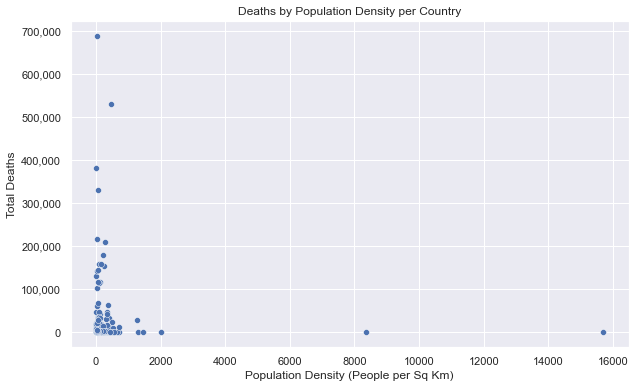

In [48]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=everything_df, x="pop_density", y="total_deaths")
plt.title("Deaths by Population Density per Country")
plt.xlabel('Population Density (People per Sq Km)')
plt.ylabel('Total Deaths')
current_values2 = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values2])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])
plt.show()

C:\Users\garre\AppData\Local\Temp\ipykernel_14324\3676304282.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values2])
C:\Users\garre\AppData\Local\Temp\ipykernel_14324\3676304282.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])


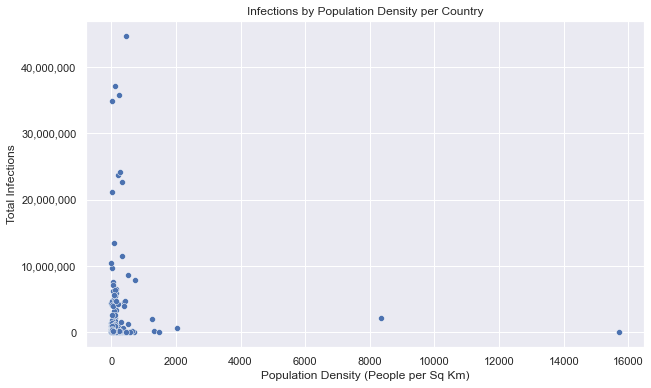

In [47]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=everything_df, x="pop_density", y="total_infections")
plt.title("Infections by Population Density per Country")
plt.xlabel('Population Density (People per Sq Km)')
plt.ylabel('Total Infections')
current_values2 = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values2])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])
plt.show()

In [49]:
everything_df.describe()

,population,land_area_sq_km,pop_density,total_infections,total_deaths
count,1.830000e+02,1.830000e+02,183.000000,1.830000e+02,183.000000
mean,3.952081e+07,6.301804e+05,295.409836,2.699948e+06,29481.010929
std,1.499024e+08,1.776439e+06,1319.288649,6.636407e+06,81302.226637
min,1.154400e+04,2.000000e+00,2.000000,2.300000e+01,0.000000
25%,2.063993e+06,2.505050e+04,39.500000,4.992500e+04,676.000000
50%,8.913088e+06,1.098200e+05,93.000000,3.441460e+05,4080.000000
75%,2.955568e+07,5.194290e+05,211.000000,1.766068e+06,18167.500000
max,1.410540e+09,1.637774e+07,15700.000000,4.466058e+07,688332.000000


In [53]:
refined1 = everything_df.loc[everything_df.pop_density < 8000, :]
refined1

,country,population,land_area_sq_km,pop_density,total_infections,total_deaths
0,Afghanistan,38346720.0,652230.0,59.0,203681.0,7826.0
1,Albania,3095344.0,27398.0,113.0,333055.0,3593.0
2,Algeria,44178884.0,2381740.0,19.0,270873.0,6881.0
3,Andorra,85560.0,468.0,183.0,46588.0,155.0
4,Angola,34795287.0,1246700.0,28.0,103131.0,1917.0
...,...,...,...,...,...,...
178,Venezuela,29789730.0,882050.0,34.0,546110.0,5823.0
179,Vietnam,103808319.0,310070.0,335.0,11505849.0,43166.0
180,Yemen,30984689.0,527968.0,59.0,11945.0,2159.0
181,Zambia,19642123.0,743398.0,26.0,333685.0,4017.0


In [54]:
refined2 = refined1.loc[refined1.total_infections < 20000000, :]
refined2

,country,population,land_area_sq_km,pop_density,total_infections,total_deaths
0,Afghanistan,38346720.0,652230.0,59.0,203681.0,7826.0
1,Albania,3095344.0,27398.0,113.0,333055.0,3593.0
2,Algeria,44178884.0,2381740.0,19.0,270873.0,6881.0
3,Andorra,85560.0,468.0,183.0,46588.0,155.0
4,Angola,34795287.0,1246700.0,28.0,103131.0,1917.0
...,...,...,...,...,...,...
178,Venezuela,29789730.0,882050.0,34.0,546110.0,5823.0
179,Vietnam,103808319.0,310070.0,335.0,11505849.0,43166.0
180,Yemen,30984689.0,527968.0,59.0,11945.0,2159.0
181,Zambia,19642123.0,743398.0,26.0,333685.0,4017.0


In [55]:
refined3 = refined2.loc[refined2.total_deaths < 250000, :]
refined3

,country,population,land_area_sq_km,pop_density,total_infections,total_deaths
0,Afghanistan,38346720.0,652230.0,59.0,203681.0,7826.0
1,Albania,3095344.0,27398.0,113.0,333055.0,3593.0
2,Algeria,44178884.0,2381740.0,19.0,270873.0,6881.0
3,Andorra,85560.0,468.0,183.0,46588.0,155.0
4,Angola,34795287.0,1246700.0,28.0,103131.0,1917.0
...,...,...,...,...,...,...
178,Venezuela,29789730.0,882050.0,34.0,546110.0,5823.0
179,Vietnam,103808319.0,310070.0,335.0,11505849.0,43166.0
180,Yemen,30984689.0,527968.0,59.0,11945.0,2159.0
181,Zambia,19642123.0,743398.0,26.0,333685.0,4017.0


In [56]:
refined3.describe()

,population,land_area_sq_km,pop_density,total_infections,total_deaths
count,1.720000e+02,1.720000e+02,172.000000,1.720000e+02,172.000000
mean,2.873594e+07,4.870909e+05,164.331395,1.399457e+06,15762.854651
std,1.129811e+08,1.220422e+06,257.894875,2.394443e+06,32508.789829
min,1.154400e+04,2.600000e+01,2.000000,2.300000e+01,0.000000
25%,1.925082e+06,2.429600e+04,37.750000,4.835575e+04,534.000000
50%,8.120964e+06,1.006250e+05,87.500000,3.146845e+05,3456.500000
75%,2.224842e+07,4.792775e+05,173.750000,1.272642e+06,15884.500000
max,1.410540e+09,9.326410e+06,2027.000000,1.352964e+07,217069.000000


C:\Users\garre\AppData\Local\Temp\ipykernel_14324\1999492239.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values2])
C:\Users\garre\AppData\Local\Temp\ipykernel_14324\1999492239.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])


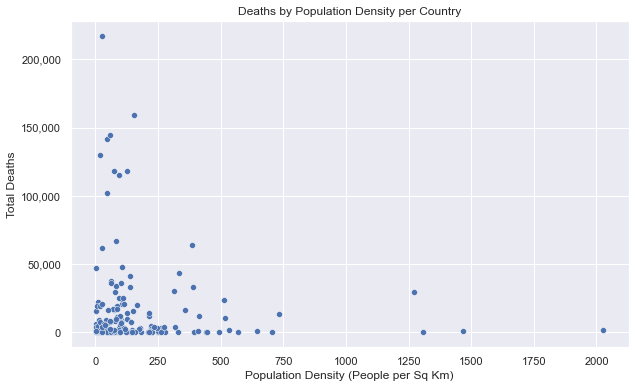

In [57]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=refined3, x="pop_density", y="total_deaths")
plt.title("Deaths by Population Density per Country")
plt.xlabel('Population Density (People per Sq Km)')
plt.ylabel('Total Deaths')
current_values2 = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values2])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])
plt.show()

C:\Users\garre\AppData\Local\Temp\ipykernel_14324\499734192.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values2])
C:\Users\garre\AppData\Local\Temp\ipykernel_14324\499734192.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])


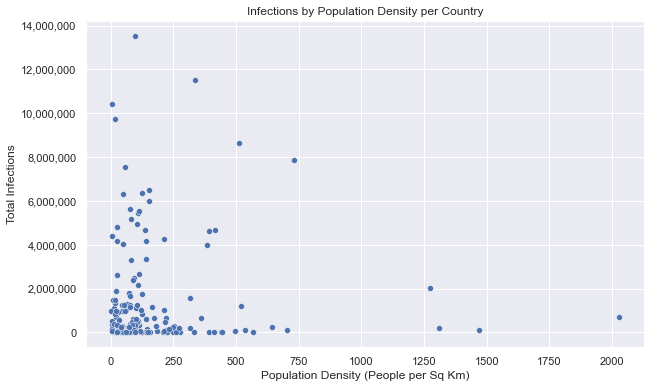

In [58]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=refined3, x="pop_density", y="total_infections")
plt.title("Infections by Population Density per Country")
plt.xlabel('Population Density (People per Sq Km)')
plt.ylabel('Total Infections')
current_values2 = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values2])
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values2])
plt.show()